# 22. Matched Pairs Testing

In [1]:
from datascience import *
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from scipy import stats

We will continue to work with a subset of the `personality` table called `pers` but the use pretest vs. posttest data in the `Stress1` and `Stress2` variables. They are the same measure, but one was conducted in the second week of the academic semester while the other was conducted in the seventh week. The **research question** asks whether stress levels are higher during midterms than early in the semester.

In [2]:
pers = Table.read_table('http://faculty.ung.edu/rsinn/perfnarc.csv')
pers.show(5)

Sex,G21,Greek,AccDate,Stress1,Stress2,Perf,Narc
F,N,N,N,9,7,99,3
F,Y,N,Y,11,13,86,2
F,N,Y,N,15,14,118,4
F,N,N,Y,16,15,113,2
F,Y,N,Y,17,17,107,8


## Matched Pairs

The exact same students were surveyed in what researchers call a pre-post format. This is **not** an A/B test because we don't have two groups of subjects A and B, we have one group only. Let's gather the columns we need.

In [3]:
stress = pers.select('Stress1','Stress2')
stress

Stress1,Stress2
9,7
11,13
15,14
16,15
17,17
10,7
16,18
12,12
11,16
18,16


The null hypothesis is that there is no change in stress between the pretest measure (2nd week) and the posttest measure (7th week). We are primarily interested in how individual stress scores changed, either increasing or decreasing, so we produce a third column called `Gain` to measure the increase from pre to post.

$$\text{Gain} = \text{Post} - \text{Pre}$$

In [4]:
pre = stress.column(0)
post = stress.column(1)
gain = post - pre
gain

array([ -2,   2,  -1,  -1,   0,  -3,   2,   0,   5,  -2,  -2,   5,   1,
        -6,   0,  -2,   5,   2,   1,  -6,   4,   2,  -2,   5,   0,   0,
        -1,  -2,   3,  -1,   3,  -1,  -1,  -3,   0,   0,   6,  -2,   5,
         2,   3,  -1,   0,   1,   0,  -4,   6,  -4,   3,   5,   0,   4,
         2,   7,   1,   4, -10,  -2,   3,   2,   4,  -7,   5,  -2,  -3,
        -1,  -1,   4,  -4,   0,   6,   2,  -3,   2,  -5,   1,   2,  -3,
        -1,   0,   0,   0,   0,   0,   0,   1,   0,   2,  -2,   0,   6,
         1,   4,   0,   1,  -3,   1,   4,   3,   1,   1,   3,   0,   7,
         5,   0,   1,  -2,   1,   5,   0,  -4,  -4,   2,  -1,   0,  -1,
         1,  -4,  -2,   5,   4,   3,   2,   2,   3,   4,   2,  -1,   4,
         4,   9,  -5,   2,   1,   3,   5,   5,  -3,   0,   0,   0,   7,
        12,   0,  -2,   3,  -4])

In [5]:
stress = stress.with_column('Gain',gain)
stress

Stress1,Stress2,Gain
9,7,-2
11,13,2
15,14,-1
16,15,-1
17,17,0
10,7,-3
16,18,2
12,12,0
11,16,5
18,16,-2


We first want to determine the observed gain value to see if stress scores increased.

In [6]:
obs_gain = np.average(gain)
obs_gain

0.831081081081081

The null hypothesis is that there is no difference between pretest and posttest scores. In that case, the gain would be zero, and it would not matter if we switched the pre and post scores. That's exactly how we will randomize the test statistic: randomly change the signs of the gain scores.

In [7]:
sign = make_array(-1,1)

In [8]:
n = len(gain)
n

148

In [9]:
ones = np.random.choice(sign,n)
ones

array([-1,  1, -1, -1, -1, -1,  1,  1, -1,  1, -1,  1, -1, -1,  1, -1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1,
       -1, -1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1,  1, -1,
       -1,  1, -1,  1, -1,  1, -1, -1, -1,  1, -1, -1, -1,  1, -1,  1,  1,
        1,  1,  1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
        1,  1,  1,  1,  1, -1, -1, -1,  1, -1,  1, -1,  1, -1,  1,  1, -1,
       -1,  1,  1, -1, -1,  1, -1, -1,  1, -1, -1,  1,  1,  1, -1,  1,  1,
        1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1,
       -1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1], dtype=int64)

Now we have a random assortment of postive and negative ones. We can multiply this array times the gain array. The result will be a random choice of sign for the gain scores. The absolute value of the gain scores will remain fixed.

In [10]:
rand_gain = ones * gain
rand_gain

array([  2,   2,   1,   1,   0,   3,   2,   0,  -5,  -2,   2,   5,  -1,
         6,   0,   2,   5,   2,   1,   6,   4,   2,  -2,   5,   0,   0,
         1,  -2,  -3,   1,   3,   1,  -1,  -3,   0,   0,  -6,  -2,  -5,
        -2,   3,   1,   0,  -1,   0,   4,  -6,   4,  -3,   5,   0,  -4,
         2,  -7,   1,  -4, -10,   2,  -3,  -2,   4,   7,  -5,   2,  -3,
         1,  -1,   4,  -4,   0,   6,  -2,  -3,   2,   5,  -1,   2,  -3,
        -1,   0,   0,   0,   0,   0,   0,   1,   0,   2,  -2,   0,  -6,
        -1,  -4,   0,  -1,  -3,  -1,   4,  -3,   1,   1,  -3,   0,   7,
         5,   0,  -1,  -2,  -1,  -5,   0,   4,   4,   2,  -1,   0,   1,
         1,  -4,  -2,  -5,   4,  -3,  -2,  -2,  -3,   4,  -2,  -1,   4,
         4,   9,   5,  -2,   1,   3,  -5,   5,   3,   0,   0,   0,   7,
        12,   0,  -2,   3,  -4], dtype=int64)

Like before, we can simulate the statistic thousands of times to determine what the test statistic distribution looks like.

In [11]:
avg_gains = make_array()

# Set reps to 2k or less especially if working in the cloud
reps = 25000

for i in range(reps):
    ones = np.random.choice(sign,n)
    new_avg_gain = np.average(ones * gain)
    avg_gains = np.append(avg_gains, new_avg_gain)
    
# Remove hashtag comment below to see the gains array   
# gains

In [12]:
def ab_hist(myArray, observed_value):
    tab = Table().with_column('Average Gains',myArray)
    tab.hist(0)
    _ = plots.plot([observed_value, observed_value], [0, 0.1], color='red', lw=2)

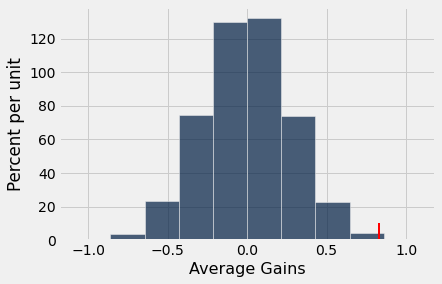

In [13]:
ab_hist(avg_gains,obs_gain)

I changed the $x$-axis title in the `ab_hist` fucntion, but everything else is identical the previous two notebooks. We can calculate a $p$-value using a truth array. The observed average gain in stress appears to be atypical given the conditions of the null hypothesis.

In [14]:
p = sum( avg_gains >= obs_gain ) / reps
p

0.0012

Reject the null hypothesis. There appears to be a significant increase in stress at midterms compared to the second week of the semester.

In [15]:
murder = Table.read_table('http://faculty.ung.edu/rsinn/crime_rates.csv').select('State', 'Year', 'Population', 'Murder Rate')
murder.set_format("Population", NumberFormatter)

State,Year,Population,Murder Rate
Alaska,1960,"226,167",10.2
Alaska,1961,"234,000",11.5
Alaska,1962,"246,000",4.5
Alaska,1963,"248,000",6.5
Alaska,1964,"250,000",10.4
Alaska,1965,"253,000",6.3
Alaska,1966,"272,000",12.9
Alaska,1967,"272,000",9.6
Alaska,1968,"277,000",10.5
Alaska,1969,"282,000",10.6


In [16]:
non_death_penalty_states = make_array('Alaska', 'Hawaii', 'Maine', 'Michigan', 'Wisconsin', 'Minnesota')
non_death_penalty_states

array(['Alaska', 'Hawaii', 'Maine', 'Michigan', 'Wisconsin', 'Minnesota'],
      dtype='<U9')

In [17]:
murder_1971 = murder.where('State',are.not_contained_in(non_death_penalty_states)).where('Year', 1971)
murder_1971

State,Year,Population,Murder Rate
Alabama,1971,"3,479,000",15.1
Arkansas,1971,"1,944,000",10.5
Arizona,1971,"1,849,000",6.7
California,1971,"20,223,000",8.1
Colorado,1971,"2,283,000",6.5
Connecticut,1971,"3,081,000",3.1
Delaware,1971,"558,000",6.1
Florida,1971,"7,041,000",13.3
Georgia,1971,"4,664,000",16
Iowa,1971,"2,852,000",1.8


In [18]:
murder_1973 = murder.where('State',are.not_contained_in(non_death_penalty_states)).where('Year', 1973)
murder_1973

State,Year,Population,Murder Rate
Alabama,1973,"3,539,000",13.2
Arkansas,1973,"2,037,000",8.8
Arizona,1973,"2,058,000",8.1
California,1973,"20,601,000",9
Colorado,1973,"2,437,000",7.9
Connecticut,1973,"3,076,000",3.3
Delaware,1973,"576,000",5.9
Florida,1973,"7,678,000",15.4
Georgia,1973,"4,786,000",17.4
Iowa,1973,"2,904,000",2.2


In [19]:
ab_murder = murder_1971.append(murder_1973).select('Year','Murder Rate')
ab_murder

Year,Murder Rate
1971,15.1
1971,10.5
1971,6.7
1971,8.1
1971,6.5
1971,3.1
1971,6.1
1971,13.3
1971,16
1971,1.8


In [20]:
def ab_diff(tab):
    tab.group(0,np.average)
    a_mean = tab.group(0,np.average).column(1).item(0)
    b_mean = tab.group(0,np.average).column(1).item(1)
    return a_mean - b_mean

In [21]:
observed_diff = ab_diff(ab_murder)
observed_diff

-0.6068181600659095

In [22]:
def ab_shuffle(tab):
    shuffle_group = tab.sample(with_replacement = False).column(0)
    shuffled_tab = tab.with_column("Shuffled Grouping",shuffle_group).select(2,1)
    return shuffled_tab

In [23]:
diffs = make_array()

# Set repetititions to 1,000 or less, especially if you're working in the cloud.
repetitions = 5000

for i in range(repetitions):
    new_diff = ab_diff(ab_shuffle(ab_murder))
    diffs = np.append(diffs, new_diff)

# Remove hashtag comment below to see results array
#diffs

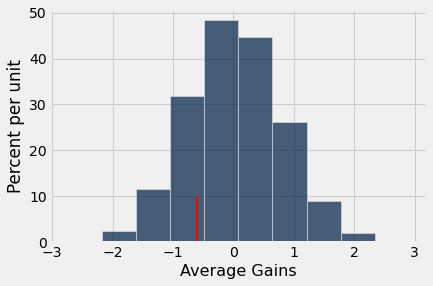

In [68]:
ab_hist(diffs, observed_diff)

In [85]:
p_value = sum( diffs <= observed_diff) / repetitions
p_value

0.2174

The result of the A/B test is to fail to reject the null. There is no evidence for a difference in murder rates between 1971 and 1973, so there is no evidence that the death penalty served as a detterent. However, this should not be an A/B test at all. We have matched pairs data with each state have a pretest score (murder rate in '71) and posttest score (murder rate in '73).


In [95]:
prepost_murder = murder_1971.join('State', murder_1973).select(0,3,6)
prepost_murder

State,Murder Rate,Murder Rate_2
Alabama,15.1,13.2
Arizona,6.7,8.1
Arkansas,10.5,8.8
California,8.1,9
Colorado,6.5,7.9
Connecticut,3.1,3.3
Delaware,6.1,5.9
Florida,13.3,15.4
Georgia,16,17.4
Idaho,3.3,2.6


In [109]:
pre = prepost_murder.column(1)
post = prepost_murder.column(2)
gain_m = post - pre

obs_gain_murder = np.average(gain_m)
obs_gain_murder

0.606818160065909

In [110]:
avg_gain_murder = make_array()

# Set reps to 2k or less especially if working in the cloud
reps = 25000

for i in range(reps):
    ones = np.random.choice(sign,44)
    new_avg_gain = np.average(ones * gain)
    avg_gain_murder = np.append(avg_gain_murder, new_avg_gain)
    
# Remove hashtag comment below to see the gains array   
# avg_gain_murder

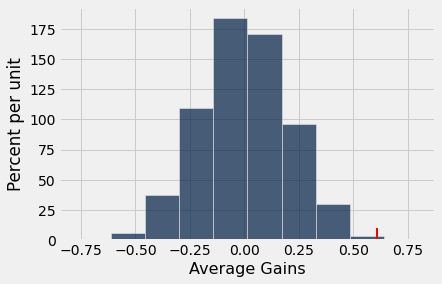

In [111]:
ab_hist(avg_gain_murder, obs_gain_murder)

In [113]:
p_val_prepost = sum( avg_gain_murder >= obs_gain_murder ) / repetitions
p_val_prepost

0.0036

In fact, we get quite the wrong results if we use A/B testing on paired data. When the appropriate testing method is used, we reject the null and find a signficant positive difference between the prestest (1971 murder rates) and the posttest (1973 murder rates). In contrast to the conclusion above, the evidence suggests the death penalty may be a deterant.